# Notes on Transformers

- Permutation Equivariance
- Equivariance in General
- Attention Graphs, Mutual Information, and Shannon Entropy
- Connections to Quantum Information Theory
- Geometry of Bilinear Forms
- Application of Persistent Homology 


## Permutation Equivariance

Equivariance in neural networks seems a prudent topic of study. Transformers, with permutation equivariance serve as a good first example. 

## Proof 1 (Full Generality of Multihead Attention)

Suppose $XP$ was given as input, where $P$ is a permutation matrix. First note that 

$$(W^i_KXP)^T(W^i_QXP) = P^T(W^i_KX)^T(W^i_QX)P.$$ 

After the softmax operation, we get 

$$\sigma[P^T(W^i_KX)^T(W^i_QX)P] = P^T\sigma[(W^i_KX)^T(W^i_QX)]P.$$ 

This can be thought of as the permutation action on the weighted attention graph by conjugation of its adjacency matrix (or the weighted adjacecny matrix above). Next, we have, 

$$\text{Attn}(XP) = XP + \sum_{i=1}^h W^i_O(W^i_V XP) \cdot P^T\sigma[(W^i_KX)^T(W^i_QX)]P = \text{Attn}(X)P,$$ 

where we used $P^TP = I$. Permutation equivariance of the token-wise feed-forward layer can be shown similarly: 

\begin{align}
\text{FF}(XP) &= \text{Attn}(X)P +W_2\cdot\text{ReLU}(W_1\cdot\text{Attn}(X)P +b_{1,n}1^TP)+b_{2,n}1^TP \\  
               & =\text{Attn}(X)P +W_2\cdot\text{ReLU}(W_1\cdot\text{Attn}(X)+b_{1,n}1^T)P +b_{2,n}1^TP \\
               &= \text{FF}(X)P
\end{align}              

where $\text{ReLU}(XP) = \text{ReLU}(X)P$ was used. This analysis shows that the function class $T_{h,m,r}(\cdot)$ is restricted to permutation equivariant functions.

## Alternate Simpler Single Head Definition of Attention and Corresponding Proof 2

We often also define attention in the following way. Let $\sigma$ denote the *softmax* function: 

$$\sigma \left( \frac{QK^T}{\sqrt{d}} \right)V $$

where 

\begin{align}
Q &= XW_Q \\
K &= XW_K \\
V &= XW_V
\end{align}

and $W_Q, W_K, W_V \in \mathbb{R}^{d \times m}$, and $X \in \mathbb{R}^{n \times d}$ has as rows, the $d$-dimensional embeddings of the $n$-tokens in the input sequence. Then we can write 

\begin{align}
\text{Attn}(PX) &= \sigma \left(\frac{(PX)W_Q((PX)W_K)^T}{\sqrt{d}}\right)(PX)W_V \\
                &= \sigma \left(\frac{(PX)W_Q(W_K^T X^T P^T)}{\sqrt{d}}\right)(PX)W_V \\
                &= \sigma\left(\frac{P(XW_QW_K^T)X^TP^T}{\sqrt{d}}\right)(PX)W_V \\
                &= P\sigma\left(\frac{XW_QW_K^TX^T}{\sqrt{d}}\right)P^TPXW_V \\
                &= P\left(\sigma\left(\frac{XW_Q(XW_K)^T}{\sqrt{d}}\right)XW_V\right) \\
                &= P\sigma \left( \frac{QK^T}{\sqrt{d}} \right)V \\
                &= P\text{Attn}(X),
\end{align}

where we used $P^TP = I$. 

Note, 

$$\text{Attn}_{i,j}(X) = \frac{\exp\left(\frac{(X_iW_Q)(X_jW_K)^T}{\sqrt{d}}\right)}{\sum_{k=1}^n\exp\left(\frac{(X_iW_Q)(X_kW_K)^T}{\sqrt{d}}\right)} = \frac{\exp\left( \frac{\langle q_i | k_j \rangle}{\sqrt{d}} \right)}{\sum_k \exp \left( \frac{\langle q_i| k_k \rangle }{\sqrt{d}}\right)}$$

where $X_i, X_j, X_k$ are rows of $X$. This suggests defining an alternate bilinear form (or learnable matrix) $\langle q_i | k_j \rangle_A = q_iAk_j^T$, where $A$ is $m \times m$ and defines a bilinear form on $\mathbb{R}^m$. We will talk a little more about this below. 

The weight of the edge between nodes $x_i$ and $x_j$ in the weighted attention graph is given by:

$$\text{Weight}_{i,j}(x_i, x_j) = \text{Attn}_{i,j}(X)$$

Thus, the weighted attention graph can be computed by computing the attention scores between all pairs of objects in $X$, and using those scores as the weights of the edges between the corresponding nodes in the graph. The permutation equivariance property of self-attention ensures that the weighted attention graph remains the same even if the objects in $X$ are permuted.

### References and Questions

1. [Are Transformers universal approximators of sequence-to-sequence functions?](https://arxiv.org/abs/1912.10077)
2. [The general theory of permutation equivarant neural networks and higher order graph variational encoders
](https://arxiv.org/abs/2004.03990)
3. What other group equivariance can we build into neural networks? See for example [A General Theory of Equivariant CNNs on Homogeneous Spaces
](https://arxiv.org/abs/1811.02017).
4. How can this be made compatible with transformers? See for example [Group Equivariant Stand-Alone Self-Attention For Vision
](https://arxiv.org/abs/2010.00977).
5. When do we need equivariance? What problems benefit from it? See for example [Geometric Deep Learning: Grids, Groups, Graphs, Geodesics, and Gauges
](https://arxiv.org/abs/2104.13478)
6. How can Group Equivariant Neural Networks be used for NLP? 
7. Are there symmetries in language that we are missing? Invariant theory applications?
8. Is this related to graph grammars and/or the topology of language? See for example [Graph Grammars - http:/ /www.its.caltech.edu](http://www.its.caltech.edu/~matilde/GraphGrammarsLing.pdf)
9. Can we apply [The Quantum Graph Recurrent Neural Network](https://pennylane.ai/qml/demos/tutorial_qgrnn.html) to understand weighted attention graphs, and is this connected to Question 6?


## Mutual Information and Entropy

The mutual information (MI) between two objects $i$ and $j$ in a set of $n$ input tokens, based on the attention scores $Attn_{i,j}(X)$, can be computed as follows:

Compute the marginal probabilities of $i$ and $j$ as follows:

$$p_i = \sum_{k=1}^n Attn_{i,k}(X)$$

$$p_j = \sum_{k=1}^n Attn_{j,k}(X)$$

Compute the joint probability of $i$ and $j$ as follows:

$p_{i,j} = Attn_{i,j}(X)$
Compute the mutual information between $i$ and $j$ as follows:

$MI(i,j) = \log_2\frac{p_{i,j}}{p_i p_j}$
The mutual information measures the degree of dependence between two random variables. In the context of attention mechanisms, it measures the amount of information that is shared between two tokens based on the attention scores. A high mutual information score indicates that the two tokens are highly dependent on each other, while a low score indicates that they are relatively independent.

The formula for mutual information can be rearranged as $MI(i,j) = \log_2\frac{p_{i,j}}{p_i p_j} = \log_2(p_{i,j}) - (\log_2(p_i)+\log_2(p_j))$. This is a valid rearrangement of the formula using the properties of logarithms. The two expressions are equivalent and will yield the same value for the mutual information score, which is very similar to the defintion of quantum mutual information between two qubits or qudits. 

The mutual information between two objects $i$ and $j$ in a set of $n$ objects, based on the attention scores $\text{Attn}_{i,j}(X)$, can be estimated as:

$$\text{MI}_{i,j}(X) \approx \sum_{k=1}^n \sum_{l=1}^n \text{Attn}_{i,j}(X) \log \frac{\text{Attn}_{i,j}(X)}{\text{Attn}_{i,k}(X)\text{Attn}_{j,l}(X)}$$

where $\text{MI}_{i,j}(X)$ is the mutual information between objects $i$ and $j$ in the set $X$.

The entropy of a set of $n$ objects, based on the attention scores $\text{Attn}_{i,j}(X)$, can be estimated as:

$$\text{H}(X) \approx -\frac{1}{n}\sum_{i=1}^n \sum_{j=1}^n \text{Attn}_{i,j}(X) \log \text{Attn}_{i,j}(X)$$

where $\text{H}(X)$ is the *Shannon* entropy of the set $X$.

If this is all true, then this implies a connection to quantum information theory where we replace nodes by qubits (perhaps qudits for $d$-dimensional embeddings), and we use von Neumann entanglement entropy and quantum mutual information computed from interaction graphs, see for example [persistent_homology_of_entanglement](https://github.com/Amelie-Schreiber/persistent_homology_of_entanglement), as well as the notebook [The Quantum Graph Recurrent Neural Network](https://pennylane.ai/qml/demos/tutorial_qgrnn.html). We will discuss persistent homology below.

## von Neumann Entanglement Entropy and Quantum Mutual Information

### von Neumann Entanglement Entropy

The von Neumann entanglement entropy is a measure of the entanglement present in a quantum system that is bipartite, i.e., it consists of two subsystems. It quantifies the amount of entanglement between the two subsystems by measuring the amount of information that is lost when one of the subsystems is traced out.

Suppose we have a bipartite quantum system consisting of two subsystems $A$ and $B$, and the overall system is described by the density matrix $\rho$. The von Neumann entanglement entropy of subsystem $A$ is defined as:

$S_A = -\operatorname{Tr}(\rho_A\log_2\rho_A)$

where $\rho_A$ is the reduced density matrix of subsystem $A$, obtained by tracing out the degrees of freedom of subsystem $B$, and $\operatorname{Tr}$ denotes the trace operation.

The von Neumann entanglement entropy measures the amount of information that is lost when subsystem $B$ is traced out. It quantifies the degree of entanglement between the two subsystems, with higher values of $S_A$ indicating stronger entanglement. If $S_A=0$, then the two subsystems are unentangled, and if $S_A>0$, then the two subsystems are entangled.

More mathematically; if a state describing two subsystems ''A'' and ''B'' 
$$|\Psi_{AB}\rangle=|\phi_A\rangle|\phi_B\rangle $$

is a separable state, then the reduced density matrix 
$$\rho_A=\operatorname{Tr}_B|\Psi_{AB}\rangle\langle\Psi_{AB}|=|\phi_A\rangle\langle\phi_A|$$

is a pure state.  Thus, the *von Neumann entropy* of the state is zero. Similarly, the density matrix of ''B'' would also have 0 entropy.  A reduced density matrix having a non-zero entropy is therefore a signal of the existence of entanglement in the system.

The von Neumann entanglement entropy is a useful tool in the study of quantum entanglement and has applications in quantum information theory, condensed matter physics, and quantum gravity. It plays a crucial role in the understanding of many-body systems and can be used to identify quantum phase transitions and topological order in condensed matter systems.

### The Quantum Mutual Information

The quantum mutual information between two qubits $q_i$ and $q_j$ is a measure of the amount of mutual information shared between the two qubits in a quantum system. It can be defined as the mutual information between the reduced density matrices of the two qubits with respect to the overall density matrix of the system.

Assuming that the quantum system is in a pure state $|\psi\rangle$ and that the density matrix of the system is given by $\rho = |\psi\rangle\langle\psi|$, the quantum mutual information between qubits $q_i$ and $q_j$ can be expressed as:

$QMI(q_i,q_j) = S(\rho_i) + S(\rho_j) - S(\rho_{i,j})$

where $S(\rho)$ is the von Neumann entropy of the density matrix $\rho$, and $\rho_i$ and $\rho_j$ are the reduced density matrices of qubits $q_i$ and $q_j$, respectively, obtained by tracing out the other qubits in the system. The reduced density matrix $\rho_{i,j}$ is obtained by tracing out all the other qubits except $q_i$ and $q_j$.

In mathematical notation, we have:

$\rho_i = Tr_{j\ne i}(\rho)$

$\rho_j = Tr_{i\ne j}(\rho)$

$\rho_{i,j} = Tr_{k\ne i,j}(\rho)$

where $Tr$ denotes the partial trace operation over the specified qubits.

The quantum mutual information can be interpreted as the amount of correlation or entanglement between the two qubits (or qudits for the case of $d$-dimensional embeddings of tokens). If $QMI(q_i,q_j)=0$, then the two qubits are uncorrelated, and if $QMI(q_i,q_j)>0$, then the two qubits are correlated or entangled.

## Alternate Bilinear Forms

Attention scores using the inner product of the query and key vectors are:

$$\text{score}(q_i, k_j) = \frac{\exp(\langle q_i, k_j \rangle)}{\sum_{j=1}^n \exp(\langle q_i, k_j \rangle)}$$

where $q_i$ is a query vector, $k_j$ is a key vector, $\langle q_i, k_j \rangle$ is the inner product between $q_i$ and $k_j$, and $n$ is the number of key vectors.

In this formulation, the attention scores are computed as the exponential of the inner product between each query vector $q_i$ and each key vector $k_j$, normalized by the sum of the exponential of the inner product between $q_i$ and all key vectors $k_j$. This normalization ensures that the attention scores sum up to 1, forming a probability distribution over the key vectors.

### Questions

1. Can we use a square matrix defining an alternate bilinear form (or learnable matrix) $\langle q_i | k_j \rangle_A = q_iAk_j^T$, where $A$ is $m \times m$ and defines a bilinear form on $\mathbb{R}^m$ (or maybe $\mathbb{C}^m$). 
2. Would this circumvent the need for the $\sqrt{d}$ in the denominator?
3. What kind of geometry might we find? 
4. What if we use complex numbers?

## Clustering and Persistent Homology

The attention graph can be used to perform clustering based on the attention scores. One common approach is to use hierarchical clustering, which groups objects together in a hierarchical tree-like structure based on their similarity. The similarity between objects can be computed based on the attention scores, using a distance metric such as the Euclidean distance or cosine similarity.

This implies a connection to and application of persistent homology, where we use the attention weights to derive a distance matrix between each pair of nodes (or use the geometric embedding to define distance), and filter the distance matrix using peristent homology. For example, say we have a distance matrix $D$. Then we can use the following code to compute one-parameter persistent homology. 

usetex mode requires TeX.


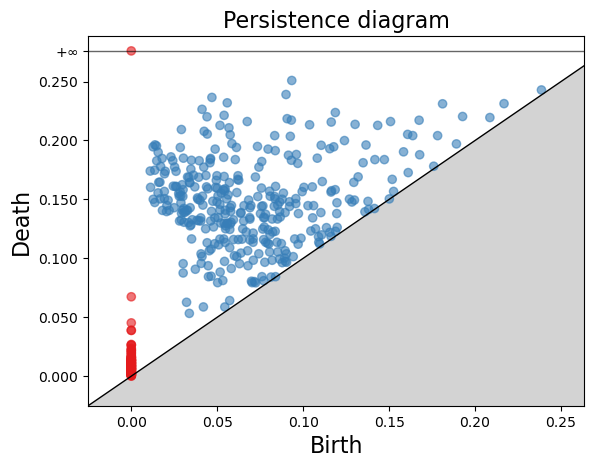

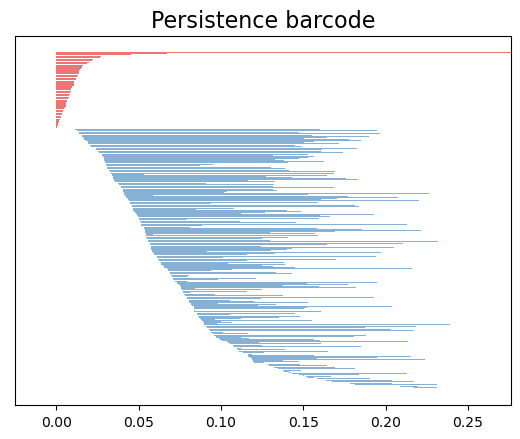

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gudhi

# Generate a random distance matrix (should use matrix obtained from weighted attention graph)
N = 100
D = np.random.rand(N, N)
D = np.triu(D) + np.triu(D, 1).T  # make it symmetric
np.fill_diagonal(D, 0)  # set diagonal to zero

# Compute the persistence homology of the distance matrix
rips_complex = gudhi.RipsComplex(distance_matrix=D)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=2)
diag = simplex_tree.persistence(homology_coeff_field=2)

# Plot the persistence diagram
gudhi.plot_persistence_diagram(diag)
plt.show()

# Plot the persistence barcode
gudhi.plot_persistence_barcode(diag)
plt.show()


## Graph Grammars

Does this imply that we can use weighted attention graphs as primitive for the building blocks of graph grammars? In particular, could we form a kind of quantum or probabilistic graph grammar similar to [Graph Grammars, Insertion Lie Algebras, and Quantum Field Theory
](https://arxiv.org/abs/1502.07796)?

Could we use persistent homology to determine when two weighted attention graphs have a high probability of merging via a rewriting rule? In particular, we want the two to have filtrations with significant overlap in terms of some distance measure between persistence diagrams. If there is a subgraph with similar persistence homology in both graphs, then the two graphs can be glued together along the subgraph via a pullback construction. This disregards weights however, and at the level of persistent homology, this would need to be approximated due to the two not having perfectly isomorphic weighted subgraphs. Similar rules for a pushout construction or some other rewriting process could also be devised. 

See [Bottleneck Distance](https://gudhi.inria.fr/doc/latest/group__bottleneck__distance.html)
or [Distances](https://mtsch.github.io/PersistenceDiagrams.jl/v0.3/generated/distances/#Distances-1)

Still don't understand how to compute the Wasserstein or Bottleneck distance of persistence diagrams...

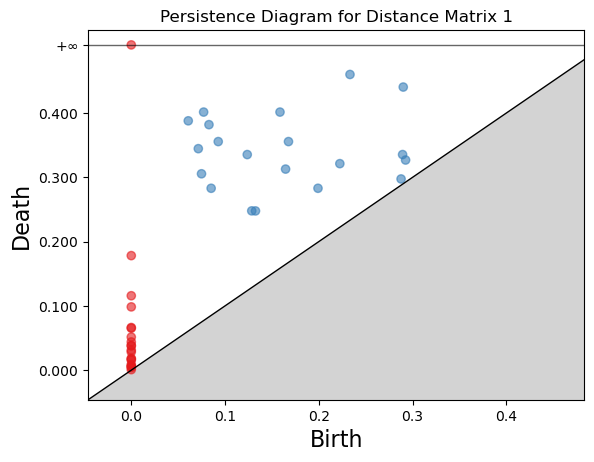

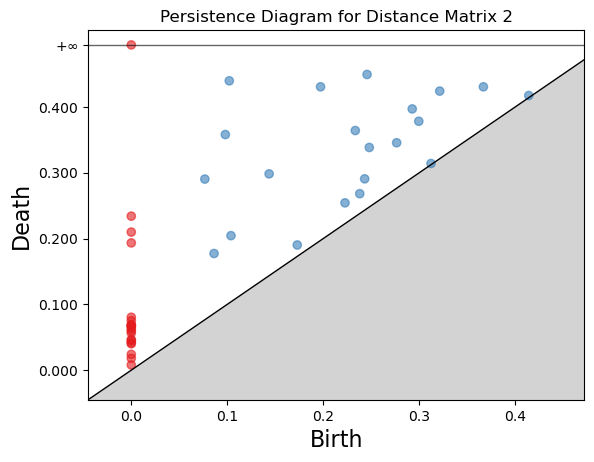

TypeError: bottleneck_distance(): incompatible function arguments. The following argument types are supported:
    1. (diagram_1: numpy.ndarray[numpy.float64], diagram_2: numpy.ndarray[numpy.float64], e: object = None) -> float

Invoked with: (1, (0.07714667262374553, 0.4013925209031374)), (1, (0.09797584440435214, 0.3579484285145468))

In [2]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt

# Define the two distance matrices as numpy arrays
#dist_matrix1 = np.array([[0.0, 1.0, 2.0], [1.0, 0.0, 3.0], [2.0, 3.0, 0.0]])
#dist_matrix2 = np.array([[0.0, 1.5, 2.0], [1.5, 0.0, 3.0], [2.0, 3.0, 0.0]])

N = 20

D1 = np.random.rand(N, N)
D1 = np.triu(D1) + np.triu(D1, 1).T  # make it symmetric
np.fill_diagonal(D1, 0)  # set diagonal to zero
dist_matrix1 = D1

D2 = np.random.rand(N, N)
D2 = np.triu(D2) + np.triu(D2, 1).T  # make it symmetric
np.fill_diagonal(D2, 0)  # set diagonal to zero
dist_matrix2 = D2

# Compute the Rips complex and persistence diagrams for each distance matrix
rips1 = gd.RipsComplex(distance_matrix=dist_matrix1)
simplex_tree1 = rips1.create_simplex_tree(max_dimension=2)
persistence_diagrams1 = simplex_tree1.persistence()

rips2 = gd.RipsComplex(distance_matrix=dist_matrix2)
simplex_tree2 = rips2.create_simplex_tree(max_dimension=2)
persistence_diagrams2 = simplex_tree2.persistence()

# Plot the persistence diagrams for each distance matrix
gd.plot_persistence_diagram(persistence_diagrams1)
plt.title('Persistence Diagram for Distance Matrix 1')
plt.show()

gd.plot_persistence_diagram(persistence_diagrams2)
plt.title('Persistence Diagram for Distance Matrix 2')
plt.show()

# Compute the bottleneck distance between the two persistence diagrams
bottleneck_distance = gd.bottleneck_distance(persistence_diagrams1[1], persistence_diagrams2[1])
print("The bottleneck distance between the two persistence diagrams is: ", bottleneck_distance)